# **Project: European Soccer Data Analysis in seasons 2008 : 2016**

# **Table of Contents**
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# **Introduction**

> In this project i gathered data from **[kaggle](https://www.kaggle.com/hugomathien/soccer)** and it is mysql data file that has:
>
> +25,000 matches.\
> +10,000 players.\
> 11 European Countries with their lead championship.\
> Seasons 2008 to 2016.\
> Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates.
>
>
> And in this project, I will focus on years [2010 - 2012 - 2015] as they are the most years that have data in the dataset.\
>So, we will discover this data to help us answer some curious questions. personally, I am interested in discovering them.
>
>

> ##### **Questions I will focus on in this analysis:**
>1. What is the league with the most goals all over the 3 years we focus on?
>2. During these three years, how has the level of defense of the teams changed?
>3. During these three years, how has the team's attack level changed?
>4. 







In [ ]:
# importing lybraries used in the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
# **Data Wrangling**

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

con = sqlite3.connect('database.sqlite')
country = pd.read_sql_query('SELECT * FROM Country', con)
league  = pd.read_sql_query('SELECT * FROM League', con)
match   = pd.read_sql_query('SELECT * FROM Match', con)
player  = pd.read_sql_query('SELECT * FROM Player', con)
player_att = pd.read_sql_query('SELECT * FROM Player_Attributes', con)
team = pd.read_sql_query('SELECT * FROM Team', con)
team_att = pd.read_sql_query('SELECT * FROM Team_Attributes', con)


In [ ]:
# to display all columns of the DataFrame.
pd.set_option("display.max_columns", None)

## **Data Assessing** :

>#### country dataset :

In [ ]:
print(country.head(), '\n\n')

print('null values: ', country.id.isnull().sum())
print('duplicated data: ', country.id.duplicated().sum())

In [ ]:
# view on the country table
country.info()

In [ ]:
# trying to know what are the unique values: 
if match.id.duplicated().sum() == 0: 
    print('[ id ] column is unique')
else: 
    print('[ id ] column is NOT unique.')

> #### league dataset :


In [ ]:
# exploring league dataset.
print(league.head(), '\n\n')

print('null values: ', league.id.isnull().sum())
print('duplicated data: ', league.id.duplicated().sum())

In [ ]:
# view on league dataset.
league.info()

In [ ]:
# trying to know what are the unique values: 
if  league.id.duplicated().sum() == 0: 
    print('[ id ] column is unique')
else: 
    print('[ id ] column is NOT unique.')

> #### match dataset :
    


In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 6)

# exploring data of the matches to check if there is duplicates, nan values.
print(match.head(), '\n\n')

print('null values: ', match.isnull().sum())
print('duplicated data: ', match.duplicated().sum())

In [ ]:
match.columns

In [ ]:
# trying to know what are the unique values: 
if match.match_api_id.duplicated().sum() == 0: 
    print('[ match_api_id ] column is unique')
else: 
    print('[ match_api_id ] column is NOT unique.')

> #### player dataset :

In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 5)

# exploring match dataset.
print(player.head(), '\n\n')

print('null values: ', player.player_api_id.isnull().sum())
print('duplicated data: ', player.player_api_id.duplicated().sum())

In [ ]:
player.info()

In [ ]:
# trying to know what are the unique values: 
if player.player_api_id.duplicated().sum() == 0: 
    print('[ player_api_id ] column is unique')
else: 
    print('[ player_api_id ] column is NOT unique.')

> #### player_attributes dataset : 

In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 5)

# exploring data of the matches to check if there is duplicates, nan values.
print(player_att.head(), '\n\n')

print('null values: ', player_att.isnull().sum().sum())
print('duplicated data: ', player_att.duplicated().sum())    

In [ ]:
player_att.info()

> #### team dataset :

In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", None)

# exploring data of the matches to check if there is duplicates, nan values.
print(team.head(), '\n\n')

print('null values: ', team.isnull().sum().sum())
print('duplicated data: ', team.duplicated().sum())    

In [ ]:
team.info()

> #### team_attributes dataset :

In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 0)

# exploring data of the matches to check if there is duplicates, nan values.
print(team_att.head(), '\n\n')

print('null values: ', team_att.isnull().sum().sum())
print('duplicated data: ', team_att.duplicated().sum())    

In [ ]:
# trying to know what are the unique values: 
if team.team_api_id.duplicated().sum() == 0: 
    print('[ team_api_id ] column is unique')
else: 
    print('[ team_api_id ] column is NOT unique.')

## Conclusion Of Assessing

##### Country dataset conclusion: 
> 11 rows, 2 columns.\
> No null values.  
> No duplicated rows.

> [ **id** ] column is unique ... we can use it in relations between tables.


##### league dataset conclusion: 
> 11 rows, 3 columns.\
> No null values.  
> No duplicated rows.


> [ **id** ] column is unique.

##### match dataset conclusion: 
> 25979 rows, 115 columns.\
> null values => 407395. ---- but all of them in columns we will not use.\
> duplicated rows => 0


>**Need to be cleaned**

> **[match_api_id]** is unique.
    


##### player dataset conclusion: 
> 11060 rows, 7 columns.\
> null values => 0\
> duplicated rows => 0

> **Need to change dtypes**

> [ **player_api_id** ] is unique

##### player_att dataset conclusion: 
> 183978 rows, 42 columns.\
> null values => 47301\
> duplicated rows => 0

> **Need to be cleaned**

> No need for unique values as each player has more than one statistics all over the years.

##### team dataset conclusion: 
> 299 rows, 5 columns.\
> null values => 11 ---- but all of them from one column 'team_fifa_api_id'. 
>
> duplicated rows => 0


> **Need to be cleaned**

> [ **team_api_id** ] is unique

##### team_att dataset conclusion: 
> 1458 rows, 25 columns.\
> null values => 969 --- from one column 'buildUpPlayDribbling' so i prefer to delete it.
>
> duplicated rows => 0


> **Need to be cleaned**

> No need for unique values as each team has more than one statistics all over the years.




## **Data Cleaning**

#### Cleaning 'match' dataset :

In [ ]:
match.info()

In [ ]:
# get rid of columns that have null values and we will not use them: 
match = match.loc[:, :'away_team_goal']

In [ ]:
# insuring that the data has no null now. 
print('number of null values now: ', match.isnull().sum().sum())

In [ ]:
# checking all dtyeps are good or not.
match.info()

In [ ]:
# the country_id is the same for the league_id
(match.country_id == match.league_id).all()

In [ ]:
# so we will drop the country_id
match.drop(columns=['country_id'], inplace=True)

In [ ]:
# converting data in the 'date' column from object => datetime.
match['date'] = pd.to_datetime(match['date'])

In [ ]:
# making a new column named 'Year' to use it to group data by the year or the season.
match['Year'] = pd.DatetimeIndex(match['date']).year

In [ ]:
# chosing the most 3 years we have data for.
match.Year.value_counts().plot(kind='bar', figsize=(8, 8))

In [ ]:
# Notice the data should be consistant with all dataframe, if we check the data in [team_att] dataframe
# we will found that there is no data for 2009 teams ... so we will not use 2009 and we use 2010 istead of it

# So our analysis will be only on 2010 - 2012 - 2015.
match = match.query('Year in [2010, 2012, 2015]')

In [ ]:
match.head(2)

#### Cleaning 'player' dataset :

In [ ]:
player.info()

In [ ]:
# we need to change data type of birthday column form object to date time.
player['birthday'] = pd.to_datetime(player['birthday'])
player.info()

##### Distribution of ages og the players:

In [ ]:
# adding a new column named 'Age' to show the distribution of the ages.
player['Age'] = pd.datetime.now().year - pd.DatetimeIndex(player['birthday']).year
player.head()


In [ ]:
ide = sorted(player.Year_of_birth.value_counts().index)
player.Year_of_birth.value_counts()[ide].plot(kind='bar', figsize=(8, 8))

#### Cleaning 'player_att' dataset :

In [ ]:
player_att.info()

In [ ]:
# we will drop all players who has null values in their attributes.
player_att.dropna(inplace=True)

In [ ]:
# check if there is null values: 
print('number of null values now: ', player_att.isnull().any().sum());

In [ ]:
# we need to change data type of [date] column form object to date time.
player_att['date'] = pd.to_datetime(player_att['date'])

# and making a column [Year] of data.
player_att['Year'] = pd.DatetimeIndex(player_att['date']).year
player_att.info()

In [ ]:
# filtering the data with players of 2010 - 2012 - 2015
player_att = player_att.query('Year in [2010, 2012, 2015]')

#### Cleaning 'team' dataset :

In [ ]:
team.info()

In [ ]:
# droping all rows that contain null values (11 value)
team.dropna(inplace=True)

In [ ]:
# check if there is null values: 
print('number of null values now: ', team.isnull().any().sum());

#### Cleaning 'team_att' dataset :

In [ ]:
team_att.info()

In [ ]:
# i'd like to drop the column itself 'which contains all null values' as i wont use it.
team_att.drop(columns = 'buildUpPlayDribbling', inplace=True)

In [ ]:
# cheacking for other null values:
print('Number of null values now: ', team_att.isnull().sum().sum())

In [ ]:
team_att.info()

In [ ]:
# changing the dtype of the column [date] from object to date time.
# and making a column with the name 'Year'.

team_att['date'] = pd.to_datetime(team_att['date'])
team_att['Year'] = pd.DatetimeIndex(team_att['date']).year
team_att.head()

In [ ]:
# filtering by the year to select data only of 2010 - 2012 - 2015
team_att = team_att.query('Year in [2010, 2012, 2015]')

#### Merging 'player' with 'player_att' datasets, to put the players info with his statistics in one dataset 'PlayerData'.

In [ ]:
print('Columns of [player] are:', '\n' , list(player.columns), '\n');
print('Columns of [player_att] are:', '\n' , list(player_att.columns), '\n');

In [ ]:
PlayerData = pd.merge(left=player, right=player_att, on=['player_api_id'])
PlayerData.head()

In [ ]:
# droping not important columns in the new DataFrame.
# driping the player and player_att dataframes, as there is no need for them now.
# del player
# del player_att
try:
    PlayerData.drop(columns=['id_x', 'id_y', 'player_api_id', 'player_fifa_api_id_x', 'player_fifa_api_id_y', 'birthday'], inplace=True)
except:
    print('already these columns were dropped!')
    

#### Merging 'team' with 'team_att' datasets, to put the players info with his statistics in one dataset 'TeamData'.

In [ ]:
print('Columns of [team] are:', '\n' , list(team.columns), '\n');
print('Columns of [team_att] are:', '\n' , list(team_att.columns), '\n');

In [ ]:
TeamData = pd.merge(left=team, right=team_att, on=['team_api_id'])
TeamData.head()

In [ ]:
# droping not important columns in the new DataFrame.
try:
    TeamData.drop(columns=['id_x', 'date', 'id_y', 'team_fifa_api_id_x', 'team_fifa_api_id_y'], inplace=True)
except:
    print('already these columns were dropped!')

In [ ]:
TeamData.head()

#### Merging 'leauge' with 'country' datasets, to put the players info with his statistics in one dataset 'LeagueCoun'.

In [ ]:
print('Columns of [league] are:', '\n' , list(league.columns), '\n');
print('Columns of [country] are:', '\n' , list(country.columns), '\n');

In [278]:
LeagueCoun = pd.merge(left=league, right=country, left_on='country_id', right_on='id')
LeagueCoun.head()

,id_x,country_id,name_x,id_y,name_y
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy


In [279]:
# droping not important columns in the new DataFrame.
# we notice that all country_ids is the same for their league_ids 
try:
    LeagueCoun.drop(columns=['id_y', 'country_id'], inplace=True)
except:
    print('already these columns were dropped!')

In [280]:
# renaming columns 
LeagueCoun.rename(columns={'id_x': 'league_id', 'name_x': 'league_name', 'name_y': 'country_name'}, inplace=True)

In [281]:
LeagueCoun

,league_id,league_name,country_name
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


#### Merging 'LeagueCount' with 'match' datasets, to put the players info with his statistics in one dataset 'Match_League_Country'.

In [282]:
print('Columns of [LeagueCoun] are:', '\n' , list(LeagueCoun.columns), '\n');
print('Columns of [match] are:', '\n' , list(match.columns), '\n');

Columns of [LeagueCoun] are: 
 ['league_id', 'league_name', 'country_name'] 

Columns of [match] are: 
 ['id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'Year'] 



In [283]:
Match_League_Country = pd.merge(left=match, right=LeagueCoun, on='league_id')
Match_League_Country.head()

,id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Year,league_name,country_name
0,377,1,2009/2010,19,2010-02-03,665626,8635,8342,3,2,2010,Belgium Jupiler League,Belgium
1,379,1,2009/2010,19,2010-02-04,665630,9986,9985,2,3,2010,Belgium Jupiler League,Belgium
2,382,1,2009/2010,19,2010-02-02,665634,8203,9993,1,0,2010,Belgium Jupiler League,Belgium
3,405,1,2009/2010,22,2010-01-30,665665,8342,10001,2,1,2010,Belgium Jupiler League,Belgium
4,406,1,2009/2010,22,2010-01-17,665666,9985,8635,0,4,2010,Belgium Jupiler League,Belgium


In [364]:
# deleting the [LeagueCoun] as we don't need it now after constructing [Match_League_Country]
# del LeagueCoun

# droping not important columns in the new DataFrame.
# we notice that all country_ids is the same for their league_ids 
try:
    Match_League_Country.drop(columns=['id', 'league_id'], inplace=True)
except:
    print('already these columns were dropped!')


already these columns were dropped!


In [365]:
# making a new column [Total_goals].
Match_League_Country['Total_goals'] = Match_League_Country.home_team_goal + Match_League_Country.away_team_goal

In [366]:
Match_League_Country.head()

,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Year,league_name,country_name,Total_goals
0,2009/2010,19,2010-02-03,665626,8635,8342,3,2,2010,Belgium Jupiler League,Belgium,5
1,2009/2010,19,2010-02-04,665630,9986,9985,2,3,2010,Belgium Jupiler League,Belgium,5
2,2009/2010,19,2010-02-02,665634,8203,9993,1,0,2010,Belgium Jupiler League,Belgium,1
3,2009/2010,22,2010-01-30,665665,8342,10001,2,1,2010,Belgium Jupiler League,Belgium,3
4,2009/2010,22,2010-01-17,665666,9985,8635,0,4,2010,Belgium Jupiler League,Belgium,4


### Our final data tables which we have and will use: 

In [298]:
PlayerData.head(1)

,player_name,height,weight,Age,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,Year
0,Aaron Appindangoye,182.88,187,30,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015


In [299]:
TeamData.head(1)

,team_api_id,team_long_name,team_short_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,Year
0,9987,KRC Genk,GEN,45,Balanced,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,2010


In [367]:
Match_League_Country.head(1)

,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Year,league_name,country_name,Total_goals
0,2009/2010,19,2010-02-03,665626,8635,8342,3,2,2010,Belgium Jupiler League,Belgium,5


<a id='eda'></a>
# **Exploratory Data Analysis**

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### 1) What is the league with the most goals all over the 3 years we focus on?

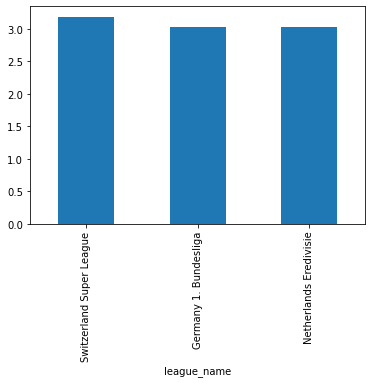

In [430]:
goal_2010 = Match_League_Country.query('Year == 2010')
propotions = goal_2010.groupby(['league_name']).mean()['Total_goals'].nlargest(3).plot.bar()
goal_2012 = Match_League_Country.query('Year == 2012')
propotions = goal_2010.groupby(['league_name']).mean()['Total_goals'].nlargest(3).plot.bar()
goal_2015 = Match_League_Country.query('Year == 2015')
propotions = goal_2010.groupby(['league_name']).mean()['Total_goals'].nlargest(3).plot.bar()



<AxesSubplot:xlabel='[overall_rating]', ylabel='potential'>

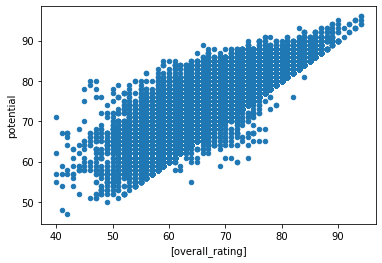

In [329]:
PlayerData.plot(kind='scatter', y='potential', x=['overall_rating'])

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!